File read successfully，total 490845 records - Timetook: 0 mins 5 seconds
Missing values processing completed - Timetook: 0 mins 5 seconds
Text columns merged and illegal characters cleaned up - Timetook: 0 mins 16 seconds
The merged text column has been saved as a CSV file, path：PCA\combined_text_results.csv - Timetook: 0 mins 26 seconds
Tfidf Vectorizer-Text vectorization completed - Timetook: 1 mins 15 seconds
Tfidf Vectorizer-Text vectorization completed - Timetook: 2 mins 0 seconds
PCA completed - Timetook: 3 mins 1 seconds
Clustering completed - Timetook: 3 mins 2 seconds
Clustering completed - Timetook: 4 mins 0 seconds
Clustering completed - Timetook: 6 mins 0 seconds
Clustering completed - Timetook: 8 mins 0 seconds
Clustering completed - Timetook: 10 mins 0 seconds
Clustering completed - Timetook: 12 mins 0 seconds
Clustering completed - Timetook: 14 mins 0 seconds
Clustering completed - Timetook: 16 mins 0 seconds
Clustering completed - Timetook: 18 mins 0 seconds
Clustering 

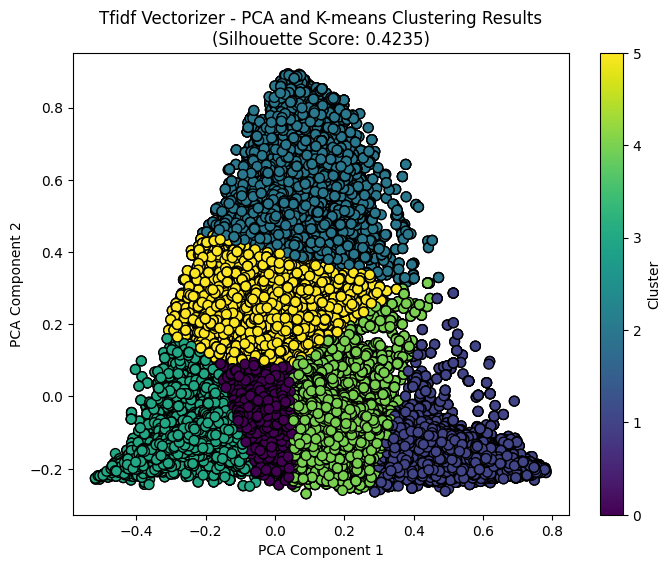

The clustering chart has been saved, path：PCA\clustering_plot.png - Timetook: 31 mins 16 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 31 mins 16 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 32 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 34 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 36 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 38 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 40 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 42 mins 0 seconds
The program has completed running, with a total execution time of 1876.18 seconds - Timetook: 44 mins 0 seconds


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  
import matplotlib.pyplot as plt
import time
import os
import re
import threading

# Record program start time
start_time = time.time()
progress_message = "processing..."  # Global variables used to store current step information

# Define a function to record time and step status
def log_status(step_description):
    global progress_message
    progress_message = step_description
    current_time = time.time()
    elapsed_time = current_time - start_time
    print(f"{step_description} - Timetook: {elapsed_time // 60:.0f} mins {elapsed_time % 60:.0f} seconds")

# Timed output progress update
def timed_progress_update():
    while True:
        time.sleep(120)  
        current_time = time.time()
        elapsed_time = current_time - start_time
        print(f"{progress_message} - Timetook: {elapsed_time // 60:.0f} mins {elapsed_time % 60:.0f} seconds")

# Start the thread for timing progress update
thread = threading.Thread(target=timed_progress_update, daemon=True)
thread.start()

# Functions for handling illegal characters: removing HTML tags and non-ASCII characters
def clean_text(text):
    # removing HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # removing non-ASCII characters
    clean_text = re.sub(r'[^\x00-\x7F]+', '', clean_text)
    return clean_text

# read files and save output path
file_path = r'emails.csv' 
output_path = r'PCA'

data = pd.read_csv(file_path)
log_status("File read successfully，total {0} records".format(len(data)))

#Missing value processing: filling missing text content
data.fillna('', inplace=True)
log_status("Missing values processing completed")

# Combine multiple text columns into a combined_text column and clean up illegal characters
data['combined_text'] = data['subject'] + ' ' + data['sender'] + ' ' + data['recipients'] + ' ' + data['body']
data['combined_text'] = data['combined_text'].apply(clean_text)  # clean text
log_status("Text columns merged and illegal characters cleaned up")

# Save the merged text columns as a CSV file
combined_output_file = os.path.join(output_path, 'combined_text_results.csv')
data[['combined_text']].to_csv(combined_output_file, index=False)
log_status(f"The merged text column has been saved as a CSV file, path：{combined_output_file}")

# TfidfVectorizer text vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limited to a maximum of 5000 features
X_tfidf = vectorizer.fit_transform(data['combined_text'])
log_status("Tfidf Vectorizer-Text vectorization completed")

# PCA dimensionality reduction: reducing high-dimensional vectors to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_tfidf.toarray())  
data['PCA_1'] = pca_data[:, 0]
data['PCA_2'] = pca_data[:, 1]
log_status("PCA completed")

# K-means analysis
kmeans = KMeans(n_clusters=6, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_data)
log_status("Clustering completed")

# Calculate the silhouette coefficient 
silhouette_avg = silhouette_score(pca_data, data['Cluster'])
log_status(f"The silhouette score for the clustering is: {silhouette_avg:.4f}")

# Save the final results as a CSV file (including PCA and clustering results) 
output_file = os.path.join(output_path, 'clustering_results.csv')
data.to_csv(output_file, index=False)
log_status(f"The final results have been saved as a CSV file, path：{output_file}")

# Draw a clustering result graph
plt.figure(figsize=(8, 6))
plt.scatter(data['PCA_1'], data['PCA_2'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title(f'Tfidf Vectorizer - PCA and K-means Clustering Results\n(Silhouette Score: {silhouette_avg:.4f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# save chart and figure
plot_file = os.path.join(output_path, 'clustering_plot.png')
plt.savefig(plot_file)
plt.show()
log_status(f"The clustering chart has been saved, path：{plot_file}")

# Record the end time of the program and print the time taken
end_time = time.time()
log_status(f"The program has completed running, with a total execution time of {end_time - start_time:.2f} seconds")
